<a href="https://colab.research.google.com/github/ishnt/Projects-and-Coursework/blob/main/ICIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas_datareader as pdr
key="395e9b7dd78e633ab528066c2f3472a99c7b51a0"

In [ ]:
df = pdr.get_data_tiingo('IBN', api_key=key)

<ipython-input-2-c7d8cedd376c>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('IBN', api_key=key)


In [ ]:
df.to_csv('IBN.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('IBN.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,IBN,2019-02-28 00:00:00+00:00,9.86,9.93,9.74,9.76,3908913,9.670742,9.739399,9.553046,9.572662,3908913,0.0,1.0
1,IBN,2019-03-01 00:00:00+00:00,9.93,9.99,9.85,9.93,4316384,9.739399,9.798247,9.660934,9.739399,4316384,0.0,1.0
2,IBN,2019-03-04 00:00:00+00:00,9.91,9.93,9.83,9.93,5111683,9.719783,9.739399,9.641318,9.739399,5111683,0.0,1.0
3,IBN,2019-03-05 00:00:00+00:00,10.35,10.35,10.15,10.16,9231592,10.151337,10.151337,9.955176,9.964984,9231592,0.0,1.0
4,IBN,2019-03-06 00:00:00+00:00,10.50,10.60,10.46,10.50,8133986,10.298458,10.396538,10.259226,10.298458,8133986,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,IBN,2024-02-20 00:00:00+00:00,25.47,25.595,25.080,25.10,9984702,25.47,25.595,25.080,25.10,9984702,0.0,1.0
1253,IBN,2024-02-21 00:00:00+00:00,25.49,25.495,25.230,25.32,4656255,25.49,25.495,25.230,25.32,4656255,0.0,1.0
1254,IBN,2024-02-22 00:00:00+00:00,25.96,25.980,25.580,25.59,5350691,25.96,25.980,25.580,25.59,5350691,0.0,1.0
1255,IBN,2024-02-23 00:00:00+00:00,25.63,25.840,25.565,25.79,4745485,25.63,25.840,25.565,25.79,4745485,0.0,1.0
1256,IBN,2024-02-26 00:00:00+00:00,25.53,25.610,25.350,25.49,4407723,25.53,25.610,25.350,25.49,4407723,0.0,1.0


In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0        9.86
1        9.93
2        9.91
3       10.35
4       10.50
        ...  
1252    25.47
1253    25.49
1254    25.96
1255    25.63
1256    25.53
Name: close, Length: 1257, dtype: float64

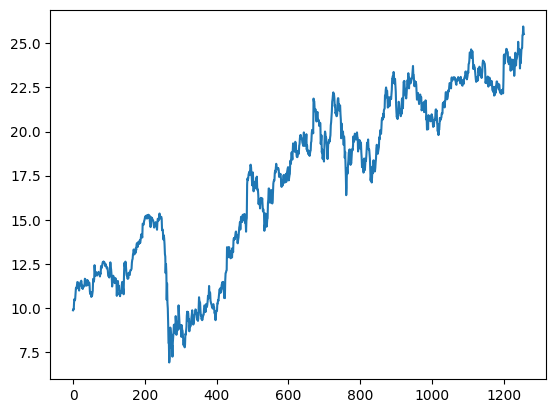

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0        9.86
1        9.93
2        9.91
3       10.35
4       10.50
        ...  
1252    25.47
1253    25.49
1254    25.96
1255    25.63
1256    25.53
Name: close, Length: 1257, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
train_data

array([[0.15529906],
       [0.15897167],
       [0.15792235],
       [0.18100735],
       [0.18887723],
       [0.18467996],
       [0.18835257],
       [0.20514166],
       [0.22035677],
       [0.22298006],
       [0.22035677],
       [0.23137461],
       [0.23924449],
       [0.23924449],
       [0.2366212 ],
       [0.23452256],
       [0.21930745],
       [0.21406086],
       [0.22770199],
       [0.22822665],
       [0.2366212 ],
       [0.23924449],
       [0.23924449],
       [0.24344176],
       [0.23504722],
       [0.22298006],
       [0.22822665],
       [0.21878279],
       [0.22770199],
       [0.22822665],
       [0.2250787 ],
       [0.22822665],
       [0.22927597],
       [0.24921301],
       [0.24816369],
       [0.2429171 ],
       [0.22875131],
       [0.23347324],
       [0.23084995],
       [0.22927597],
       [0.2455404 ],
       [0.2429171 ],
       [0.23871983],
       [0.23609654],
       [0.23032529],
       [0.23819517],
       [0.23189927],
       [0.210

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 278ms/step - loss: 0.0441 - val_loss: 0.0884
Epoch 2/100
12/12 [==============================] - 2s 213ms/step - loss: 0.0123 - val_loss: 0.0015
Epoch 3/100
12/12 [==============================] - 3s 225ms/step - loss: 0.0061 - val_loss: 0.0110
Epoch 4/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0039 - val_loss: 0.0077
Epoch 5/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0033 - val_loss: 0.0017
Epoch 6/100
12/12 [==============================] - 2s 179ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 7/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 3s 268ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 9/100
12/12 [==============================] - 2s 162ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 10/100
12/12 [==============================] - 2s 172ms/step - loss: 0.0027 - val_lo

In [ ]:
import tensorflow as tf

In [ ]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 36ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:

### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

14.906905325337787

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

21.5052575965127

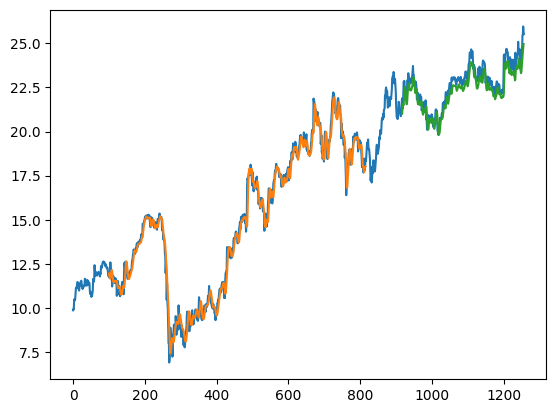

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.94543463]
101
1 day input [0.8273872  0.83683106 0.8478489  0.83210913 0.84050367 0.83315845
 0.82528856 0.83105981 0.83788038 0.83105981 0.81164743 0.81164743
 0.80587618 0.82004197 0.81427072 0.79433368 0.7980063  0.79695698
 0.82056663 0.80220357 0.80640084 0.82581322 0.8363064  0.8363064
 0.83053515 0.82004197 0.81899265 0.82791186 0.81269675 0.8273872
 0.81899265 0.80587618 0.80220357 0.80535152 0.80587618 0.79853095
 0.81007345 0.8043022  0.80167891 0.81217209 0.80115425 0.84312697
 0.91343127 0.91657922 0.89716684 0.89034627 0.90346275 0.91762854
 0.92130115 0.93336831 0.93284365 0.92602308 0.92549843 0.92287513
 0.89506821 0.89926548 0.88772298 0.89087093 0.89821616 0.90870934
 0.8887723  0.8683106  0.88405037 0.88667366 0.90188877 0.89034627
 0.87198321 0.89506821 0.89506821 0.90083945 0.87880378 0.85309549
 0.86778594 0.89087093 0.92182581 0.91500525 0.88405037 0.90346275
 0.90398741 0.90870934 0.91657922 0.9181532  0.95435467 0.92864638
 0.92549843 0.93179433 0.9270724  0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,201)

In [ ]:
import matplotlib.pyplot as plt

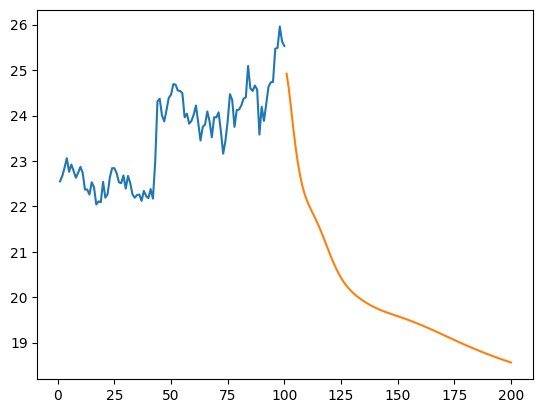

In [ ]:

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

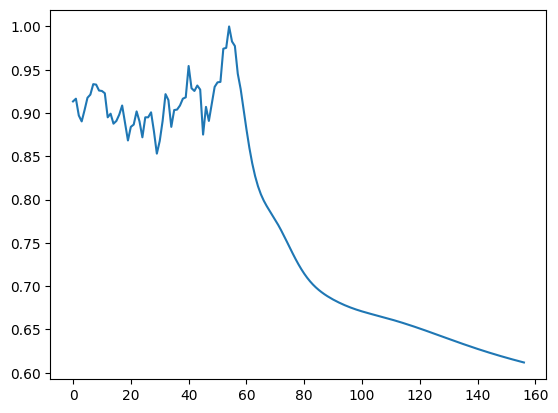

In [ ]:

df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

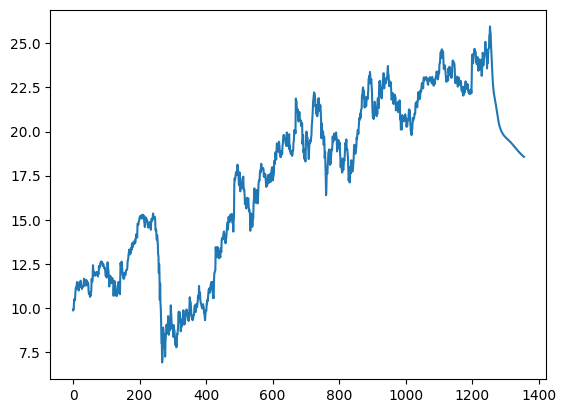

In [ ]:

plt.plot(df3)